In [159]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [160]:
train_data=pd.read_csv(r"C:\Users\AL-YAMEN\Desktop\Predicting Titanic Survivors\train.csv")
test_data=pd.read_csv(r"C:\Users\AL-YAMEN\Desktop\Predicting Titanic Survivors\test.csv")

EDA

In [161]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [164]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [166]:
train_num = train_data[["Age", "SibSp", "Parch", "Fare"]]
train_str = train_data[["Survived", "Sex", "Cabin", "Embarked", "Ticket"]]

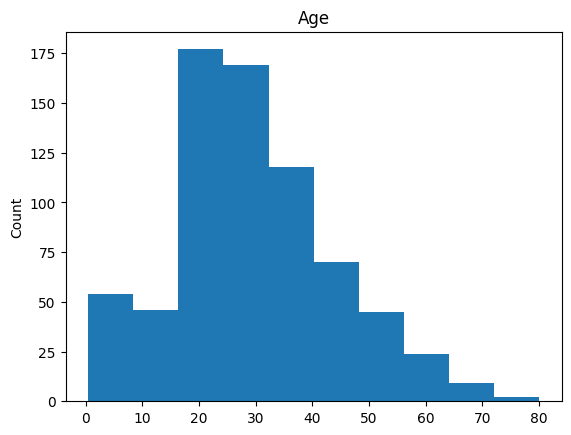

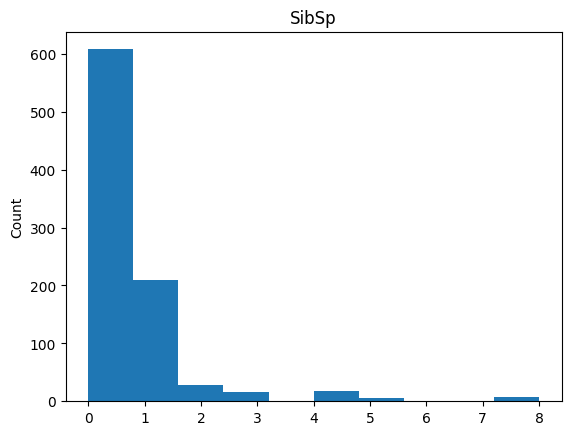

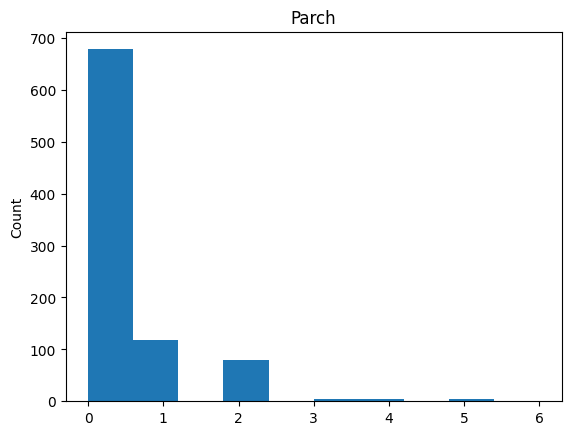

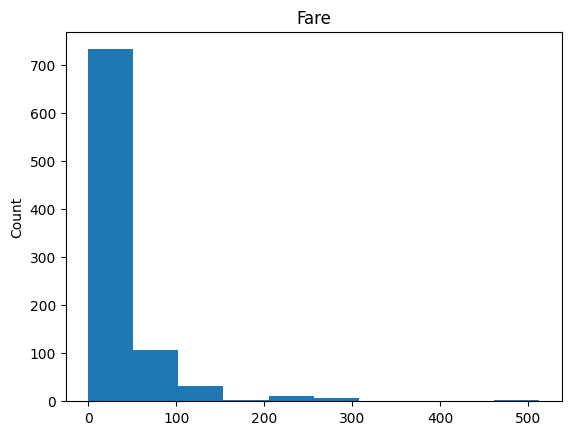

In [167]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.ylabel("Count")
    plt.show()

In [168]:

print( train_num.groupby(train_str["Survived"]).mean())

                Age     SibSp     Parch       Fare
Survived                                          
0         30.626179  0.553734  0.329690  22.117887
1         28.343690  0.473684  0.464912  48.395408


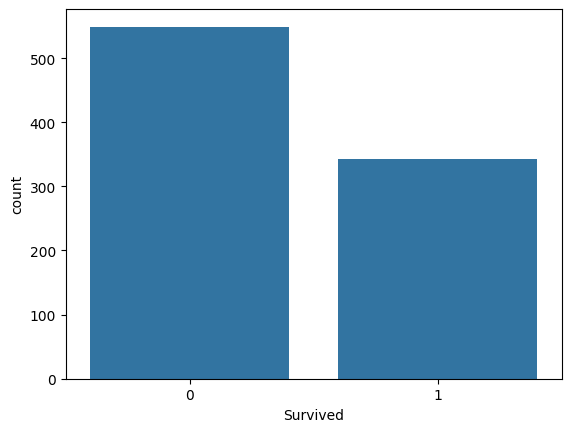

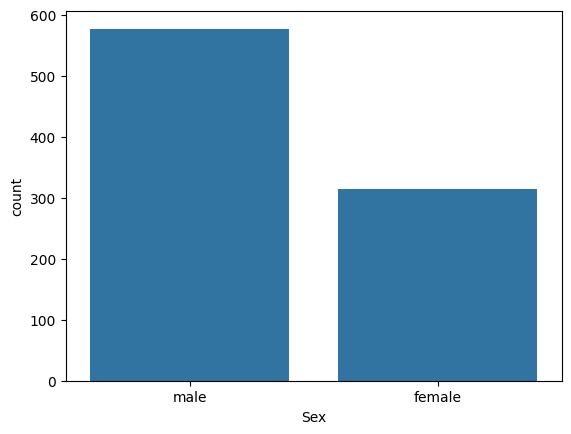

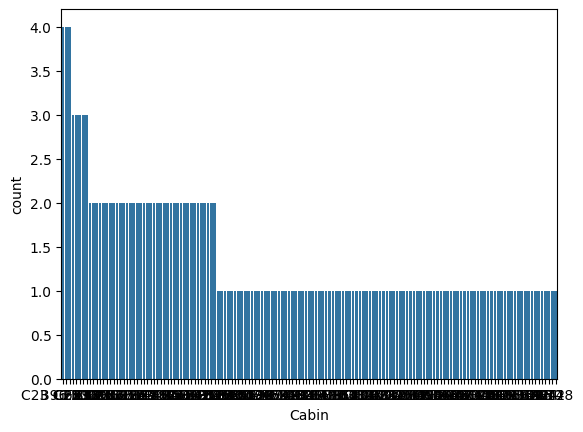

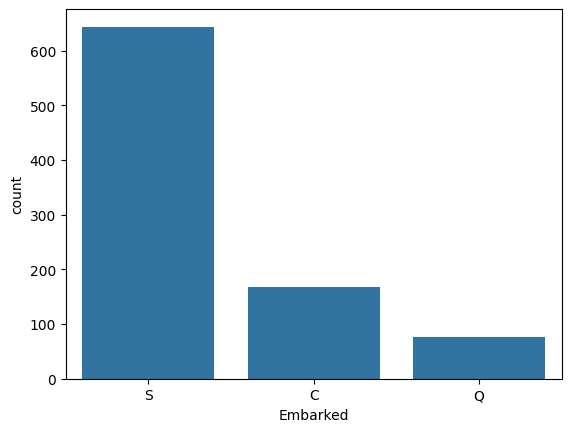

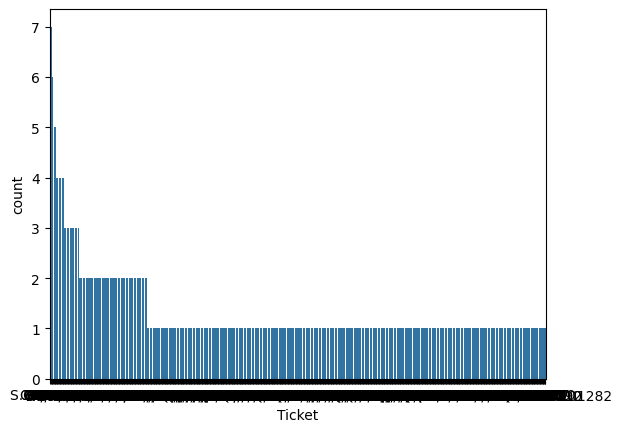

In [169]:
for i in train_str.columns:
    sns.barplot(x=train_str[i].value_counts().index, y=train_str[i].value_counts(), )
    plt.show()

In [170]:
df=pd.DataFrame(train_data)

df.pivot_table(index="Survived",aggfunc="count",columns="Sex",values="Ticket")

Sex,female,male
Survived,,
0,81,468
1,233,109


In [171]:
df.pivot_table(index="Survived",aggfunc="count",columns="Pclass",values="Ticket")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [172]:
df.pivot_table(index="Survived",aggfunc="count",columns="Embarked",values="Ticket")

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


Data Preprocessing


In [ ]:
train_data = train_data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [174]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())

In [175]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [177]:
print(f"mode is:{train_data["Embarked"].mode()}")

mode is:0    S
Name: Embarked, dtype: object


In [87]:
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [88]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Using LabelEncoder for Sex & Embarked

In [181]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
train_data["Sex"]=label_enc.fit_transform(train_data["Sex"])
train_data["Embarked"]=label_enc.fit_transform(train_data["Embarked"])

In [182]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


In [183]:

X = train_data.drop(columns=["Survived"], axis=1)
y = train_data["Survived"]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


Model Building

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 7), (223, 7), (668,), (223,))

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [105]:
# Create a dictionary called models which contains all of the classification models we've imported

models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

In [112]:
np.random.seed(42)

In [113]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

c:\Users\AL-YAMEN\Desktop\Predicting Titanic Survivors\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.7802690582959642,
 'KNN': 0.6771300448430493,
 'SVC': 0.6502242152466368,
 'LogisticRegression': 0.7802690582959642,
 'RandomForestClassifier': 0.7892376681614349}

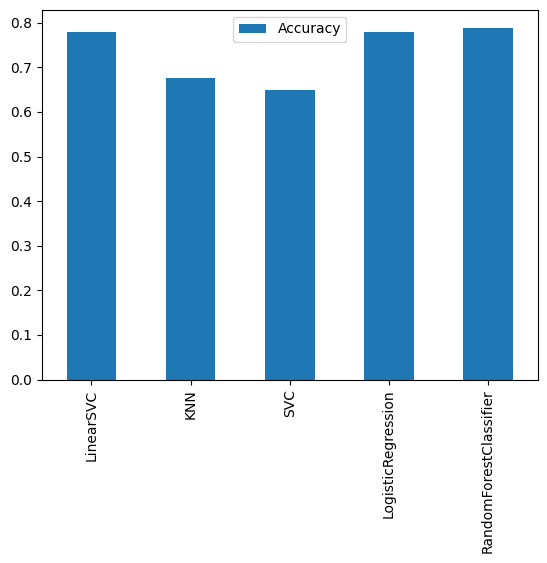

In [114]:
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar();

In [117]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            param_distributions=param_grid,
                              cv=5,
                              n_iter=5,
                              verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


In [119]:
grid_search.score(X_test, y_test)

0.8251121076233184

In [120]:
grid_search.best_score_

np.float64(0.8368084390079676)

In [122]:
# Instantiate a RandomForesrtClassifier using the best hyperparameters from RandomizedSearchCV
clf = RandomForestClassifier(n_estimators=200,max_depth=None,min_samples_split=2,min_samples_leaf=2,bootstrap=True)

# Fit the new instance with the best hyperparameters on the training data 


clf.fit(X_train, y_train);

In [124]:
# Import the evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay

In [179]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1])

In [126]:
confusion_matrix(y_test, y_preds)

array([[122,  18],
       [ 22,  61]])

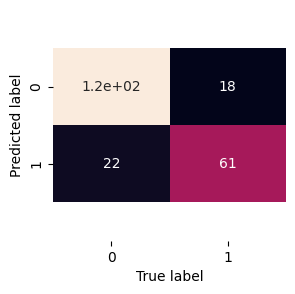

In [128]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    
plot_conf_mat(y_test, y_preds)

In [129]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       140
           1       0.77      0.73      0.75        83

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



The accuracy of the model is 82%